Install requirements

In [ ]:
!pip install tensorflow tensorflow-datasets librosa

Import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import librosa
import numpy as np

Only grab the dataset where instument == keyboard

In [ ]:
# Constants
KEYBOARD_FAMILY_LABEL = 4 # According to NSynth dataset family label
SAMPLE_RATE = 16000
TRIM_LENGTH = 3 * SAMPLE_RATE  # Trim to the first 3 seconds

def process_data(example):
    audio = example['audio']
    instrument_family = example['instrument']['family']
    pitch = example['pitch']

    is_keyboard = tf.equal(instrument_family, KEYBOARD_FAMILY_LABEL)

    def process_keyboard_sample(audio, pitch):
        audio = audio[:TRIM_LENGTH]
        if pitch < 21:
            # Instead of returning None, return a marker (e.g., a zero-length tensor)
            return tf.zeros((0,)), tf.constant(-1, dtype=tf.int64)
        else:
            pitch = pitch - 21
            return audio, pitch

    return tf.cond(is_keyboard, lambda: process_keyboard_sample(audio, pitch), lambda: (audio, pitch))

def filter_keyboard_samples(example):
    return tf.equal(example['instrument']['family'], KEYBOARD_FAMILY_LABEL)

def filter_invalid_samples(audio, pitch):
    # Check if the sample is valid (not marked for removal)
    return tf.size(audio) > 0 and tf.not_equal(pitch, -1)

def get_data_loader(data_split, batch_size=64, num_batches=None):
    ds = tfds.load('nsynth', split=data_split, as_supervised=False)

    ds = ds.filter(filter_keyboard_samples)
    ds = ds.map(process_data, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.filter(filter_invalid_samples)
    ds = ds.batch(batch_size)
    if num_batches:
        ds = ds.take(num_batches)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)

    return ds

In [ ]:
# Input to model
batch_size = 32
train_loader = get_data_loader('train', batch_size, num_batches=80)
val_loader = get_data_loader('valid', batch_size, num_batches=10)
test_loader = get_data_loader('test', batch_size, num_batches=10)
classes = list(range(88))

for audio, pitch in train_loader.take(5):
    print(pitch)

Dl Completed...:   0%|          | 0/1069 [00:00<?, ? file/s]

Dataset nsynth downloaded and prepared to /root/tensorflow_datasets/nsynth/full/2.3.3. Subsequent calls will reuse this data.
tf.Tensor(
[85 10 60 33 48 84 21 54 13 33  0  6 49 52 56 17  4 74  6 40 63 20 44 41
  7 22 67 64  8 78 16 48], shape=(32,), dtype=int64)
tf.Tensor(
[14 29 87 32 70 84 65 66 30 56 28 85 47 33 24 49 81 18 21 51 34 61 36  8
 10 45 61 70 74 33 57 52], shape=(32,), dtype=int64)
tf.Tensor(
[42 16 62 72 38 63 72 58 35 40 68 67 22  3 47 57 68 77 50 28 45 46 33 65
 30 22 10 74  5 16 81 52], shape=(32,), dtype=int64)
tf.Tensor(
[70 27 58 49 17 14 52 19 19 84 15 86 67 16 11 65 25 55 53 15 24 72 73 51
 37  6 76 24 72 13 25 41], shape=(32,), dtype=int64)
tf.Tensor(
[79 31 60 45 83 38 28 25 56  9 38 43 52 86 25 57 16 27 25 25 21 76 59 43
 46 64 43 13 85 26  7 36], shape=(32,), dtype=int64)


In [ ]:
# printing a sample audio and pitch value
for audio, pitch in train_loader.take(1):
    first_sample_audio = audio[0]
    first_sample_pitch = pitch[0]

    # Calculate the maximum and minimum values
    max_value = tf.reduce_max(first_sample_audio)
    min_value = tf.reduce_min(first_sample_audio)

    # Calculate the range (max - min)
    range_value = max_value - min_value

    print(f"First sample audio max value: {max_value.numpy()}")
    print(f"First sample audio min value: {min_value.numpy()}")
    print(f"First sample audio range: {range_value.numpy()}")
    print(f"First sample pitch: {first_sample_pitch.numpy()}")

First sample audio max value: 0.46275418996810913
First sample audio min value: -0.46886491775512695
First sample audio range: 0.9316191077232361
First sample pitch: 85


In [ ]:
for audio, pitch in train_loader:
  print(audio.shape)
  print(pitch.shape)


(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000)
(32,)
(32, 48000

In [ ]:
# get number of batches in each loader
def get_dataset_length(data_loader):
    length = 0
    for _ in data_loader:
        length += 1
    return length

# Use this function to get the length of your data loaders
test_loader_length = get_dataset_length(test_loader)
val_loader_length = get_dataset_length(val_loader)
train_loader_length = get_dataset_length(train_loader)

print(f"Train loader length: {train_loader_length}")
print(f"Validation loader length: {val_loader_length}")
print(f"Test loader length: {test_loader_length}")

Train loader length: 80
Validation loader length: 10
Test loader length: 10


In [ ]:
# get number of samples in each loader
def get_dataset_sample_count(data_loader):
    total_samples = 0
    for audio, pitch in data_loader:
        # Count the number of samples in each batch
        batch_samples = tf.shape(audio)[0]  # assuming audio is a 2D tensor [batch_size, features]
        total_samples += batch_samples
    return total_samples

# Use this function to get the number of samples in your data loaders
test_samples_count = get_dataset_sample_count(test_loader)
val_samples_count = get_dataset_sample_count(val_loader)
train_samples_count = get_dataset_sample_count(train_loader)

print(f"Train loader samples: {train_samples_count}")
print(f"Validation loader samples: {val_samples_count}")
print(f"Test loader samples: {test_samples_count}")

Train loader samples: 2560
Validation loader samples: 320
Test loader samples: 320


In [ ]:
################################################################################################################################################################
####################################################################### Model and Training #####################################################################
################################################################################################################################################################

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

torch.manual_seed(10)

In [ ]:
for audio, pitch in train_loader.take(1):
  print(f"Audio shape: {audio.shape}")

Audio shape: (32, 48000)


In [ ]:
# Model architecture

'''
class PitchDetectionModel(nn.Module):
  def __init__(self):
    super(PitchDetectionModel, self).__init__()
    self.conv1 = nn.Conv1d(in_channels=1,     out_channels=1024,  kernel_size=4, stride=4)
    self.conv2 = nn.Conv1d(in_channels=1024,  out_channels=128,   kernel_size=4, stride=4)
    self.conv3 = nn.Conv1d(in_channels=128,   out_channels=128,   kernel_size=4, stride=4)
    self.conv4 = nn.Conv1d(in_channels=128,   out_channels=256,   kernel_size=2, stride=2)
    self.pool  = nn.MaxPool1d(2, 2)
    self.fc1   = nn.Linear(256*23, 88)

  def forward(self, x):                   # Input length 48,000,  channels 1
    x = self.pool(F.relu(self.conv1(x)))  #       length 6,000,   channels 1024
    x = self.pool(F.relu(self.conv2(x)))  #       length 750,     channels 128
    x = self.pool(F.relu(self.conv3(x)))  #       length 93,      channels 128
    x = self.pool(F.relu(self.conv4(x)))  #       length 23,      channels 256
    x = x.view(-1, 256*23)                # Flatten the tensor
    x = self.fc1(x)                       # Output length 88
    # x = F.softmax(self.fc1(x))
    return x                              # Assuming CELoss
'''

'\nclass PitchDetectionModel(nn.Module):\n  def __init__(self):\n    super(PitchDetectionModel, self).__init__()\n    self.conv1 = nn.Conv1d(in_channels=1,     out_channels=1024,  kernel_size=4, stride=4)\n    self.conv2 = nn.Conv1d(in_channels=1024,  out_channels=128,   kernel_size=4, stride=4)\n    self.conv3 = nn.Conv1d(in_channels=128,   out_channels=128,   kernel_size=4, stride=4)\n    self.conv4 = nn.Conv1d(in_channels=128,   out_channels=256,   kernel_size=2, stride=2)\n    self.pool  = nn.MaxPool1d(2, 2)\n    self.fc1   = nn.Linear(256*23, 88)\n\n  def forward(self, x):                   # Input length 48,000,  channels 1\n    x = self.pool(F.relu(self.conv1(x)))  #       length 6,000,   channels 1024\n    x = self.pool(F.relu(self.conv2(x)))  #       length 750,     channels 128\n    x = self.pool(F.relu(self.conv3(x)))  #       length 93,      channels 128\n    x = self.pool(F.relu(self.conv4(x)))  #       length 23,      channels 256\n    x = x.view(-1, 256*23)              

In [ ]:
from keras import layers, models

In [ ]:
'''
class PitchDetectionModel(tf.keras.Model):
  def __init__(self):
    super(PitchDetectionModel, self).__init__()
    self.conv1 = tf.keras.layers.Conv1D(in_channels=1,     out_channels=1024,  kernel_size=4, stride=4)
    self.conv2 = tf.keras.layers.Conv1D(in_channels=1024,  out_channels=128,   kernel_size=4, stride=4)
    self.conv3 = tf.keras.layers.Conv1D(in_channels=128,   out_channels=128,   kernel_size=4, stride=4)
    self.conv4 = tf.keras.layers.Conv1D(in_channels=128,   out_channels=256,   kernel_size=2, stride=2)
    self.pool  = tf.keras.layers.MaxPool1D(2, 2)
    self.fc1   = tf.keras.layers.Dense(88)

  def call(self, x):                   # Input length 48,000,  channels 1
    x = self.pool(tf.nn.relu(self.conv1(x)))  #       length 6,000,   channels 1024
    x = self.pool(tf.nn.relu(self.conv2(x)))  #       length 750,     channels 128
    x = self.pool(tf.nn.relu(self.conv3(x)))  #       length 93,      channels 128
    x = self.pool(tf.nn.relu(self.conv4(x)))  #       length 23,      channels 256
    x = tf.reshape(x, (-1, 256*23))                # Flatten the tensor
    x = self.fc1(x)                       # Output length 88
    # x = tf.nn.softmax(self.fc1(x))
    return x                              # Assuming CELoss

model = PitchDetectionModel()
'''

'\nclass PitchDetectionModel(tf.keras.Model):\n  def __init__(self):\n    super(PitchDetectionModel, self).__init__()\n    self.conv1 = tf.keras.layers.Conv1D(in_channels=1,     out_channels=1024,  kernel_size=4, stride=4)\n    self.conv2 = tf.keras.layers.Conv1D(in_channels=1024,  out_channels=128,   kernel_size=4, stride=4)\n    self.conv3 = tf.keras.layers.Conv1D(in_channels=128,   out_channels=128,   kernel_size=4, stride=4)\n    self.conv4 = tf.keras.layers.Conv1D(in_channels=128,   out_channels=256,   kernel_size=2, stride=2)\n    self.pool  = tf.keras.layers.MaxPool1D(2, 2)\n    self.fc1   = tf.keras.layers.Dense(88)\n\n  def call(self, x):                   # Input length 48,000,  channels 1\n    x = self.pool(tf.nn.relu(self.conv1(x)))  #       length 6,000,   channels 1024\n    x = self.pool(tf.nn.relu(self.conv2(x)))  #       length 750,     channels 128\n    x = self.pool(tf.nn.relu(self.conv3(x)))  #       length 93,      channels 128\n    x = self.pool(tf.nn.relu(self.con

In [ ]:

# class PitchDetectionModel(tf.keras.Model):
#     def __init__(self):
#         super(PitchDetectionModel, self).__init__()
#         self.reshape = layers.Reshape((48000, 1))
#         self.conv1 = layers.Conv1D(1024, kernel_size=4, strides=4, activation='relu')
#         self.conv2 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')
#         self.conv3 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')
#         self.conv4 = layers.Conv1D(256, kernel_size=2, strides=2, activation='relu')
#         self.pool = layers.MaxPooling1D(2)
#         self.flatten = layers.Flatten()
#         self.fc1 = layers.Dense(88)

#     def call(self, x):
#         x = self.reshape(x)
#         x = self.pool(self.conv1(x))
#         x = self.pool(self.conv2(x))
#         x = self.pool(self.conv3(x))
#         x = self.pool(self.conv4(x))
#         x = self.flatten(x)
#         return self.fc1(x)


In [ ]:
class PitchDetectionModel(tf.keras.Model):
    def __init__(self):
        super(PitchDetectionModel, self).__init__()
        self.reshape = layers.Reshape((48000, 1))
        self.conv1 = layers.Conv1D(1024, kernel_size=4, strides=4, activation='relu')
        self.drop1 = layers.Dropout(0.2)  # Dropout layer after conv1
        self.conv2 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')
        self.drop2 = layers.Dropout(0.2)  # Dropout layer after conv4
        self.conv3 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')
        self.drop3 = layers.Dropout(0.5)  # Dropout layer after conv4
        self.conv4 = layers.Conv1D(256, kernel_size=2, strides=2, activation='relu')
        self.drop4 = layers.Dropout(0.5)  # Dropout layer after conv4
        self.pool = layers.MaxPooling1D(2)
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(88)

    def call(self, x, training=False):
        x = self.reshape(x)
        x = self.conv1(x)
        x = self.pool(x)
        x = self.drop1(x, training=training)  # Apply dropout only during training
        x = self.conv2(x)
        x = self.pool(x)
        x = self.drop2(x, training=training)
        x = self.conv3(x)
        x = self.pool(x)
        x = self.drop3(x, training=training)
        x = self.conv4(x)
        x = self.pool(x)
        x = self.drop4(x, training=training)
        x = self.flatten(x)
        return self.fc1(x)


In [ ]:
'''
class PitchDetectionModel(tf.keras.Model):
  def __init__(self):
    super(PitchDetectionModel, self).__init__()
    self.reshape = layers.Reshape((48000, 1))
    self.conv1 = layers.Conv1D(1024, kernel_size=4, strides=4, activation='relu')
    self.conv2 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')
    self.conv3 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')
    self.conv4 = layers.Conv1D(256, kernel_size=2, strides=2, activation='relu')
    self.pool = layers.MaxPooling1D(2)
    self.flatten = layers.Flatten()
    self.fc1 = layers.Dense(88)

  def call(self, x):                   # Input length 48,000,  channels 1
    x = self.pool(tf.nn.relu(self.conv1(x)))  #       length 6,000,   channels 1024
    x = self.pool(tf.nn.relu(self.conv2(x)))  #       length 750,     channels 128
    x = self.pool(tf.nn.relu(self.conv3(x)))  #       length 93,      channels 128
    x = self.pool(tf.nn.relu(self.conv4(x)))  #       length 23,      channels 256
    x = tf.reshape(x, (-1, 256*23))                # Flatten the tensor
    x = self.fc1(x)                       # Output length 88
    # x = tf.nn.softmax(self.fc1(x))
    return x                              # Assuming CELoss
'''

"\nclass PitchDetectionModel(tf.keras.Model):\n  def __init__(self):\n    super(PitchDetectionModel, self).__init__()\n    self.reshape = layers.Reshape((48000, 1))\n    self.conv1 = layers.Conv1D(1024, kernel_size=4, strides=4, activation='relu')\n    self.conv2 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')\n    self.conv3 = layers.Conv1D(128, kernel_size=4, strides=4, activation='relu')\n    self.conv4 = layers.Conv1D(256, kernel_size=2, strides=2, activation='relu')\n    self.pool = layers.MaxPooling1D(2)\n    self.flatten = layers.Flatten()\n    self.fc1 = layers.Dense(88)\n\n  def call(self, x):                   # Input length 48,000,  channels 1\n    x = self.pool(tf.nn.relu(self.conv1(x)))  #       length 6,000,   channels 1024\n    x = self.pool(tf.nn.relu(self.conv2(x)))  #       length 750,     channels 128\n    x = self.pool(tf.nn.relu(self.conv3(x)))  #       length 93,      channels 128\n    x = self.pool(tf.nn.relu(self.conv4(x)))  #       length 23, 

Fit model on training data
Epoch 1/35
80/80 [==============================] - 10s 107ms/step - loss: 4.4027 - sparse_categorical_accuracy: 0.0148 - val_loss: 4.1970 - val_sparse_categorical_accuracy: 0.0188
Epoch 2/35
80/80 [==============================] - 8s 104ms/step - loss: 3.9762 - sparse_categorical_accuracy: 0.0441 - val_loss: 3.5938 - val_sparse_categorical_accuracy: 0.0594
Epoch 3/35
80/80 [==============================] - 8s 104ms/step - loss: 3.5164 - sparse_categorical_accuracy: 0.0848 - val_loss: 3.1908 - val_sparse_categorical_accuracy: 0.1500
Epoch 4/35
80/80 [==============================] - 8s 104ms/step - loss: 3.0523 - sparse_categorical_accuracy: 0.1949 - val_loss: 2.6303 - val_sparse_categorical_accuracy: 0.3031
Epoch 5/35
80/80 [==============================] - 8s 104ms/step - loss: 2.5001 - sparse_categorical_accuracy: 0.3461 - val_loss: 2.2162 - val_sparse_categorical_accuracy: 0.4406
Epoch 6/35
80/80 [==============================] - 8s 104ms/step - loss

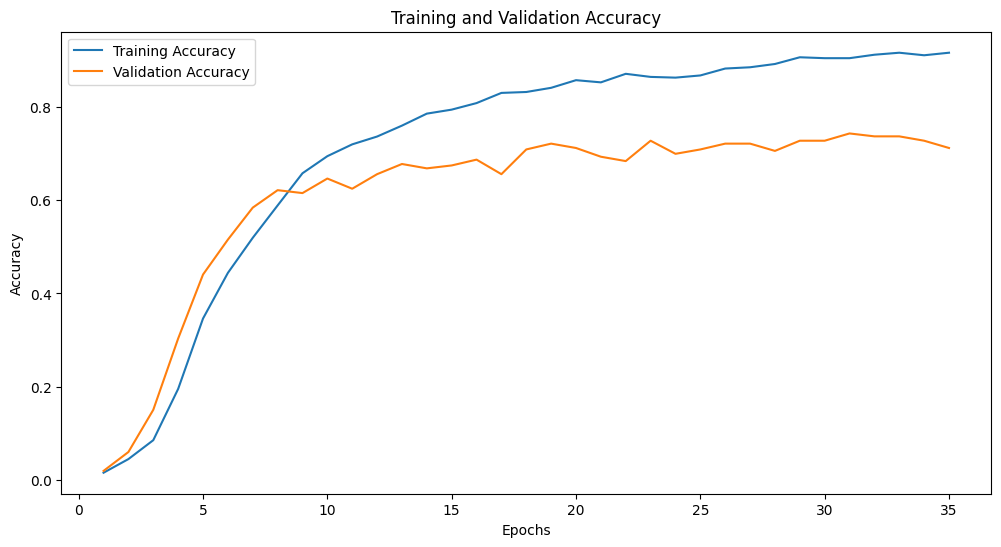

In [ ]:
# Create an instance of the model
model = PitchDetectionModel()

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(0.001),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

# Train the model
# history = model.fit(train_loader, epochs=10, validation_data=val_loader)

print("Fit model on training data")
history = model.fit(
  x=train_loader,
  epochs=35,
  verbose=1,
  validation_data=val_loader
)
'''
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)
'''

import matplotlib.pyplot as plt

training_accuracy = history.history['sparse_categorical_accuracy']
validation_accuracy = history.history['val_sparse_categorical_accuracy']

epochs = range(1, len(training_accuracy) + 1)

# Plotting the accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_loader)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

10/10 [==============================] - 1s 39ms/step - loss: 2.0310 - sparse_categorical_accuracy: 0.7031
Test accuracy: 0.703125, Test loss: 2.0309624671936035
